**Bellman Equations for Policy Search**

In this exercise, we are going to implement the Bellman equations for policy search in the next MDP, which we have already used previously:

![alt text](two_state_mdp.png "Title")

Let us start with the imports. We use numpy and matplotlib, and the magic command `%matplotlib inline` to show the results in the notebook.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The next thing we do is to seed the random number generator. This is done to ensure that the results are reproducible. At this point, this is not strictly necessary, but it is good practice to do so (and when working with Deep Reinforcement Learning, it is absolutely necessary).

In [8]:
rng = np.random.default_rng(1234)

Now, let us define the parameters of the problem. We have an MDP with two states, and two actions. The rewards, discount factor, and transition probabilities are given in the figure above. We also define the four possible deterministic policies as $\pi_1$, $\pi_2$, $\pi_3$, and $\pi_4$:

In [9]:
gamma = 0.9
R = np.array([[-1, 0.6, 0.5, -0.9]]).T
P = np.array([[0.8, 0.2], [0.2, 0.8], [0.3, 0.7], [0.9, 0.1]])
pi_1 = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])
pi_2 = np.array([[0, 1, 0, 0], [0, 0, 1, 0]])
pi_3 = np.array([[1, 0, 0, 0], [0, 0, 0, 1]])
pi_4 = np.array([[0, 1, 0, 0], [0, 0, 0, 1]])

Now, let us implement the Bellman equations, using the fixed point equations seen in the slides.
* $v^{\pi} = \left( I - \gamma \mathcal{P}^{\pi} \right)^{-1} \mathcal{R}^{\pi}$
* $q^{\pi} = \left( I - \gamma \mathcal{P} \Pi \right)^{-1} \mathcal{R}$
Note that, attending to the results, we know that $\pi_2$ is the optimal policy, as it provides the highest value.

In [10]:
def bellman_equations(R, P, gamma, pi):
    # Code to be filled by the student
    return v_pi

for pi in [pi_1, pi_2, pi_3, pi_4]:
    v_pi = bellman_equations(R, P, gamma, pi)
    with np.printoptions(precision=2, suppress=True):
        print(f"Policy = {pi.flatten()}")
        print(f"v^pi = {v_pi.flatten()}")

Policy = [1 0 0 0 0 0 1 0]
v^pi = [-5.09 -2.36]
Policy = [0 1 0 0 0 0 1 0]
v^pi = [5.34 5.25]
Policy = [1 0 0 0 0 0 0 1]
v^pi = [-9.83 -9.74]
Policy = [0 1 0 0 0 0 0 1]
v^pi = [-0.63 -1.55]


Now, we are going to evaluate many random policies, and store their values.

In [11]:
n_policies_to_test = 1000  # Number of random policies to test
values = []  # List to store the values of the policies

for _ in range(n_policies_to_test):
    # Code to be filled by the student: obtain random policies pi_random
    v_pi = bellman_equations(R, P, gamma, pi_random)
    values.append(v_pi.flatten())

Finally, since every value is a two-element vector, we are going to plot the results in order to check that the optimal policy was, indeed, $\pi_2$. Note that this procedure, although intuitive, is not affordable in the general case, as we need to evaluate a possibly infinite number of policies. We will see in the course more efficient ways to find the optimal policy.

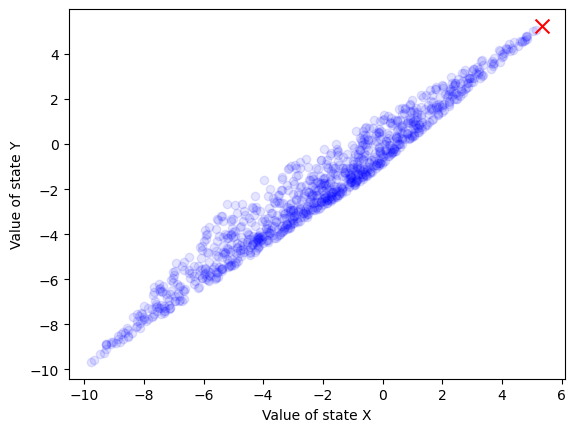

In [12]:
values = np.array(values)
plt.scatter(values[:, 0], values[:, 1], color='b', alpha=0.1)
v_pi_2 = bellman_equations(R, P, gamma, pi_2).flatten()
plt.scatter(v_pi_2[0], v_pi_2[1], color='r', marker='x', s=100)
plt.xlabel("Value of state X")
plt.ylabel("Value of state Y")
plt.show()